<a href="https://colab.research.google.com/github/OH1107/Kaggle/blob/main/2020%20Kaggle%20Machine%20Learning%20%26%20Data%20Science%20Survey/%5BKaggle_2020%5D_Visualization_%26_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Kaggle 2020] Visualization & Analysis

## Data/Library Preparation 

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['figure.dpi'] = 200 #high resolution

In [9]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2020 Kaggle Machine Learning & Data Science Survey/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
questions = data.iloc[0,:].T
data=data.iloc[1:,:]

## Q1 & Q2. Age/Gender Distribution

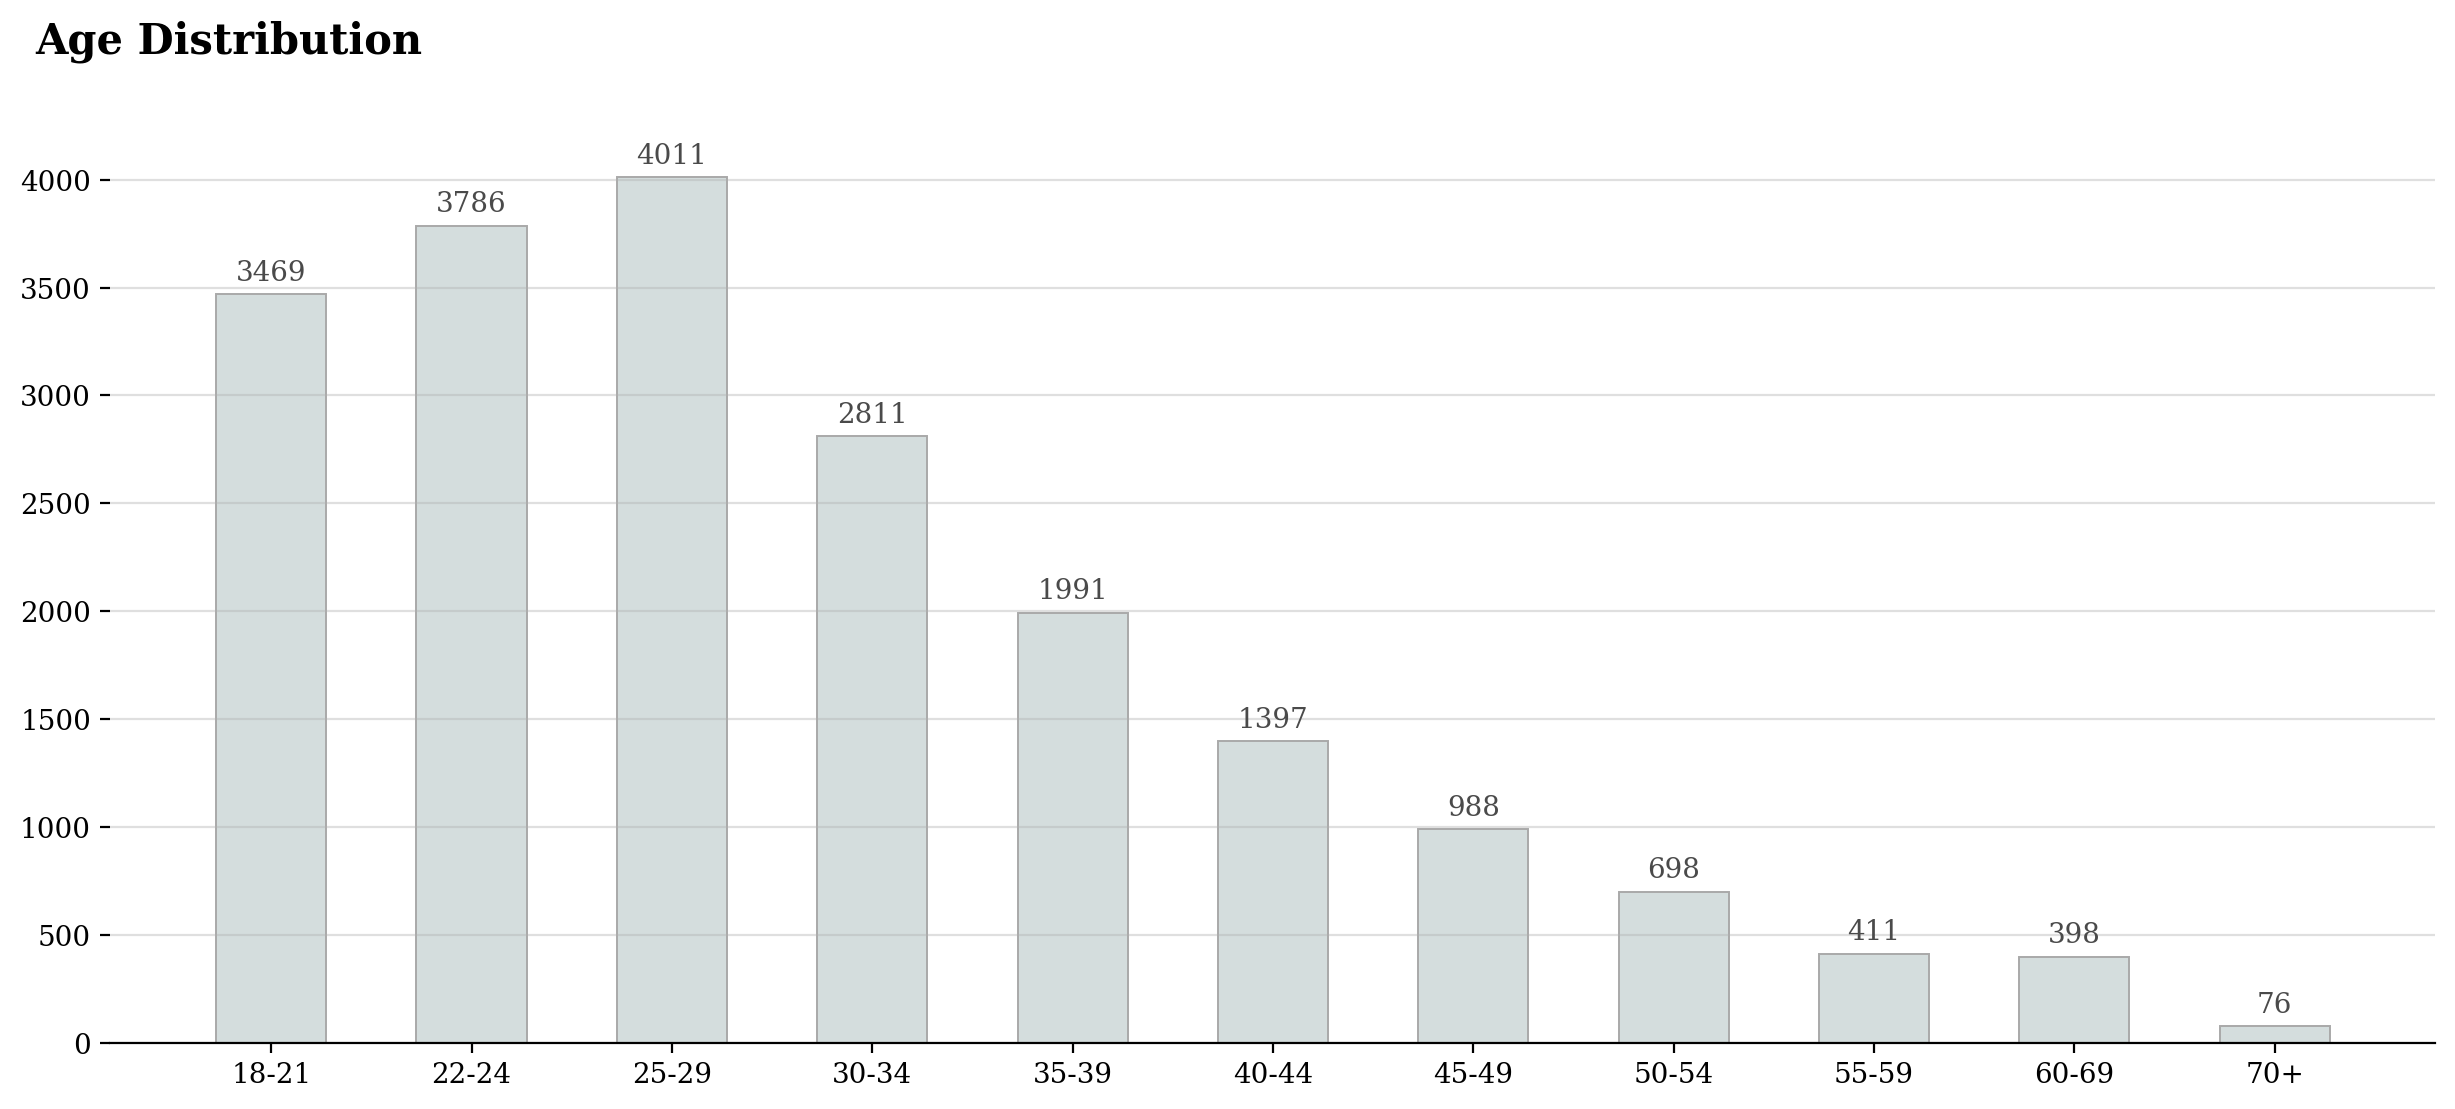

In [27]:
# Q1 & Q2 Analysis
fig, ax = plt.subplots(1,1,figsize=(15,6))
data_q1 = data['Q1'].value_counts().sort_index()
ax.bar(data_q1.index, data_q1, width=0.55, edgecolor='darkgray', color='#d4dddd', linewidth=0.7)

for i in data_q1.index:
  ax.annotate(f"{data_q1[i]}",
              xy=(i, data_q1[i]+100),
              va='center', ha='center', fontweight='light', fontfamily='serif',
              color='#4a4a4a')

for s in ['top','left','right']:
  ax.spines[s].set_visible(False)

ax.set_ylim(0, 4200)
ax.set_xticklabels(data_q1.index, fontfamily='serif')
ax.set_yticklabels(np.arange(0,4001, 500), fontfamily='serif')
fig.text(0.1,0.95,'Age Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()

전체의 절반 이상이 30세 미만임을 알 수 있습니다.

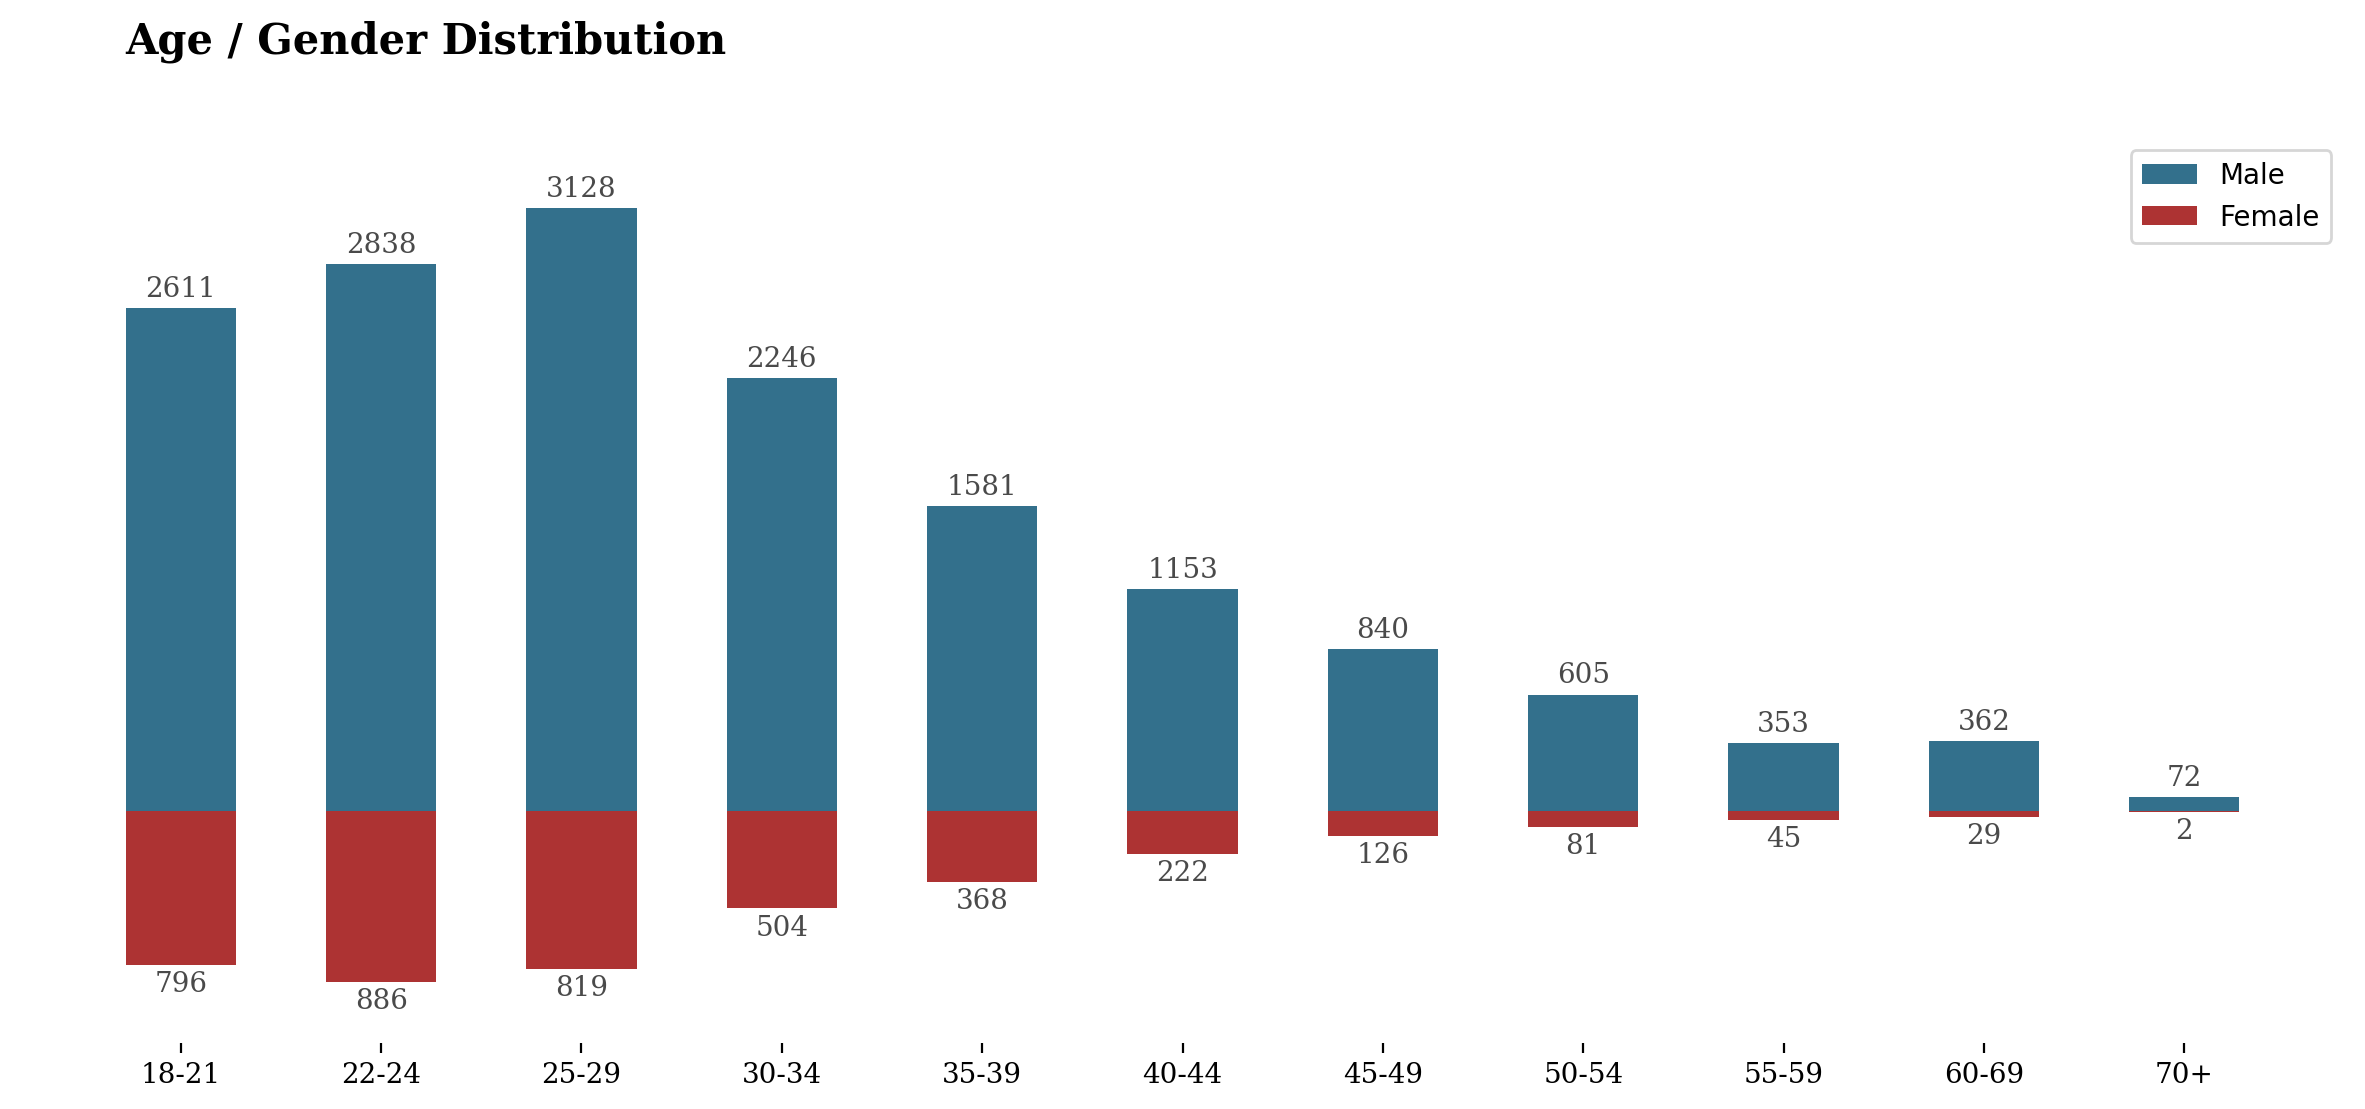

In [61]:
# Q2 Analysis
data['Q2']=data['Q2'].apply(lambda x: 'ETC' if x not in ['Man', 'Woman'] else x)
data_q1q2 = data[data['Q2'] != 'ETC'].groupby(['Q2'])['Q1'].value_counts().unstack().sort_index()
man = data_q1q2.loc['Man']
woman = -data_q1q2.loc['Woman']

fig, ax = plt.subplots(1,1, figsize=(15,6))
ax.bar(man.index, man, width=0.55, color='#004c70', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.55, color='#990000', alpha=0.8, label='Female')
ax.set_ylim(-1200, 3500)

for i in man.index:
  ax.annotate(f"{man[i]}",
              xy=(i, man[i]+100),
              va='center',ha='center', fontweight='light',fontfamily='serif',
              color='#4a4a4a')

for i in woman.index:
  ax.annotate(f"{-woman[i]}",
              xy=(i, woman[i] - 100),
              va='center',ha='center', fontweight='light',fontfamily='serif',
              color='#4a4a4a')
  
for s in ['top' ,'left', 'right','bottom']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q1q2.columns, fontfamily='serif')
ax.set_yticks([])
ax.legend()
fig.text(0.16, 0.95, 'Age / Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
plt.show()

분명 여성이 많이 유입된 것은 사실이나, 아직 여성은 적다는 것을 알 수 있습니다.

## Q2 & Q3. Gender & Country

In [88]:
q3_order = data['Q3'].value_counts()[:11].drop('Other').index
data_q2q3 = data[['Q2', 'Q3']].groupby('Q3')['Q2'].value_counts().unstack().loc[q3_order]
data_q2q3['sum']=data_q2q3.sum(axis=1)
data_q2q3_ratio=(data_q2q3.T / data_q2q3['sum']).T[['Man','Woman','ETC']].rename(index={'United States of America':'USA','United Kingdom of Great Britain and Northern Ireland':'UK'})[::-1]

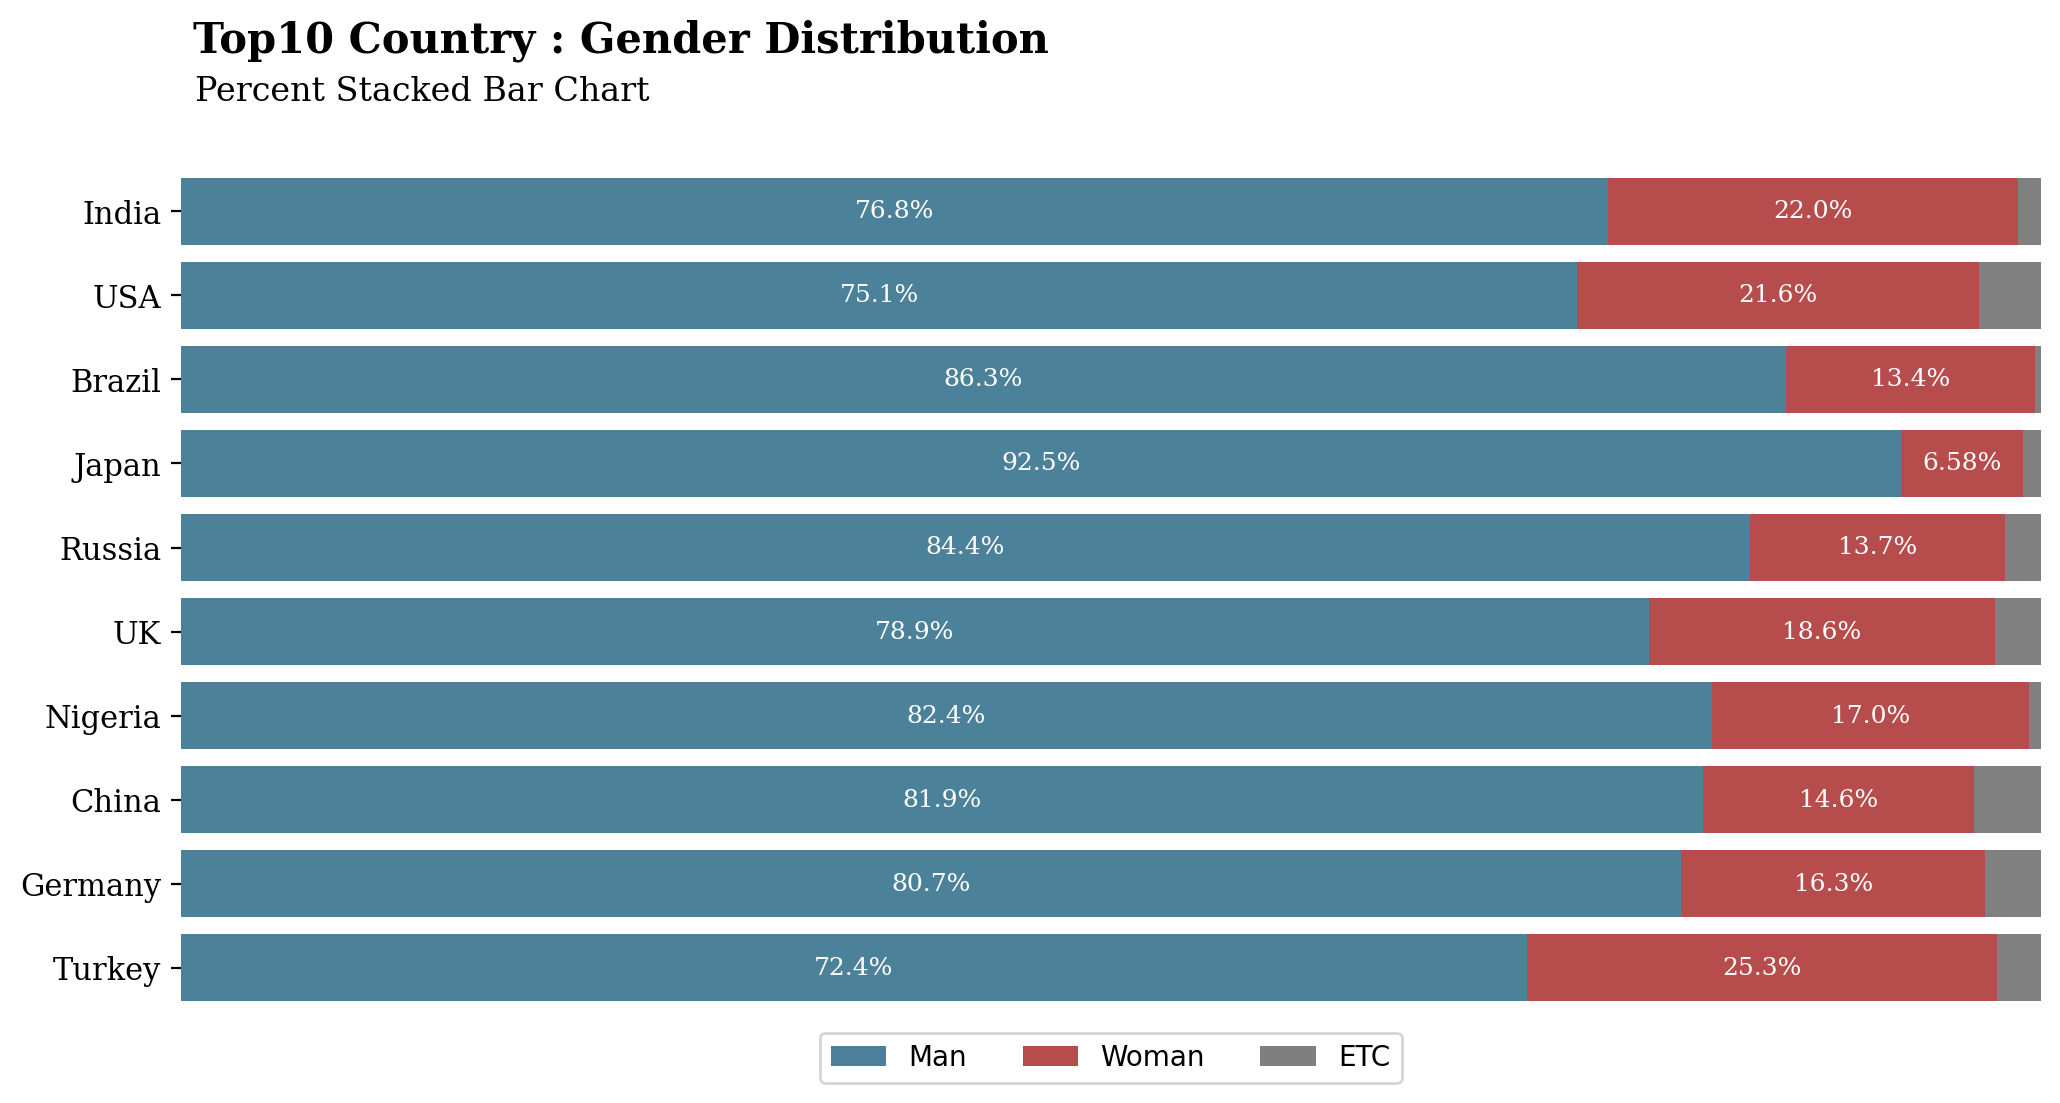

In [104]:
fig, ax = plt.subplots(1,1,figsize=(12,6),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Man'], color='#004c70', alpha=0.7, label='Man')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Woman'], left=data_q2q3_ratio['Man'], color='#990000', alpha=0.7, label='Woman')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['ETC'], left=data_q2q3_ratio['Man']+data_q2q3_ratio['Woman'], color='#4a4a4a', alpha=0.7, label='ETC')

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
  ax.annotate(f"{data_q2q3_ratio['Man'][i]*100:.3}%",
              xy=(data_q2q3_ratio['Man'][i]/2, i),
              va='center', ha='center', fontsize=9, fontweight='light', fontfamily='serif',
              color='white')
  
# female percentage
for i in data_q2q3_ratio.index:
  ax.annotate(f"{data_q2q3_ratio['Woman'][i]*100:.3}%",
              xy=(data_q2q3_ratio['Man'][i]+data_q2q3_ratio['Woman'][i]/2, i),
              va='center', ha='center', fontsize=9, fontweight='light', fontfamily='serif',
              color='white')
  
fig.text(0.13, 0.95, 'Top10 Country : Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.131, 0.91, 'Percent Stacked Bar Chart',fontsize=12, fontfamily='serif')

for s in ['top', 'left', 'right', 'bottom']:
  ax.spines[s].set_visible(False)

ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))
plt.show()

응답자 수 상위 10개국의 성별 비율.  

여성의 수가 여전히 매우 적다는 것을 알 수 있습니다.  

특히 일본에서는 6.5%만이 여성입니다.